## 1. Import necessary packages

In [8]:
import cv2
import torch

from matplotlib import pyplot as plt
from util.utils import load_state_dict, load_checkpoint
from util.visualize import plot_bounding_boxes_on_image

## 2. Load a model and class information

We encode class information into the checkpoint, use our defined `load_state_dict` to handle it.

In [9]:
from configs.relation_detr.relation_detr_resnet50_800_1333 import model
weight = load_checkpoint("https://github.com/xiuqhou/Relation-DETR/releases/download/v1.0.0/relation_detr_resnet50_800_1333_coco_1x.pth")
load_state_dict(model, weight)
model = model.eval()

INFO:Relation-DETR.util.utils:<All keys matched successfully>


In [10]:
image = cv2.imread("data/coco/val2017/000000000139.jpg")
torch_image = torch.tensor(image.transpose(2, 0, 1))

## 3. Inference on the image

In [11]:
with torch.no_grad():
    predictions = model([torch_image])[0]
# The following code also works:
# predictions = model(torch_image.unsqueeze(0))[0]

## 4. Visualize results

In [12]:
image_for_show = plot_bounding_boxes_on_image(
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    boxes=predictions["boxes"],
    labels=predictions["labels"],
    scores=predictions["scores"],
    classes=model.CLASSES,  # class information
    show_conf=0.5,
    font_scale=1.0,
    box_thick=2,
    text_alpha=0.75,
)

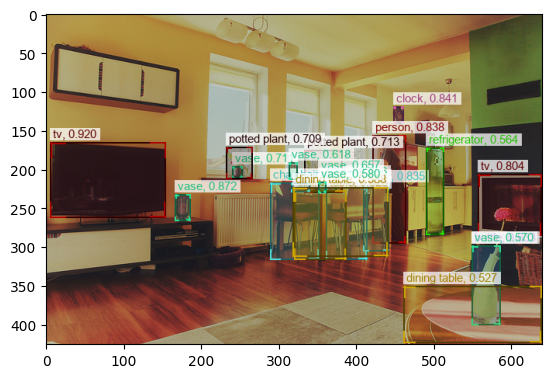

In [13]:
plt.imshow(image_for_show)